Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN

Haar Cascades

In [2]:
def detect_face (img):
    face_img = img.copy()
    face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_frontalface_default.xml')
    detect_img = face_cascade.detectMultiScale(face_img, scaleFactor=1.3, minNeighbors=3)
    
    #get the coordinates and draw a rectangle
    for (x,y,w,h) in detect_img:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (0,255,0), 3)
    
    return face_img

DNN

In [3]:
def dnn(img, size, score):
    h, w = img.shape[:2]

    img_copy = img.copy()
    modelFile = "input/res10_300x300_ssd_iter_140000.caffemodel"
    configFile = "input/deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

    # preprocessing
    blob = cv2.dnn.blobFromImage(img_copy, 1.0, size, (104.0, 117.0, 123.0))
    net.setInput(blob)
    faces = net.forward()

    # faces is 4-d array
    # 3rd dim: 1: class_id, 2: score, 3-6: boxes
    for i in range(faces.shape[2]):
        confidence = faces[0, 0, i, 2]
        if confidence > score:
            box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x, y, x1, y1) = box.astype("int")
            cv2.rectangle(img_copy, (x, y), (x1, y1), (0, 0, 255), 2)
    return img_copy

MTCNN

In [38]:
def mtcnn(img):
    detector = MTCNN()
    faces = detector.detect_faces(img)
    for result in faces:
        x, y, w, h = result['box']
        x1, y1 = x + w, y + h
        cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
        for key, value in result['keypoints'].items():
            cv2.circle(img, value, radius=3, thickness=2, color=(0, 0, 255))
    return img

Images

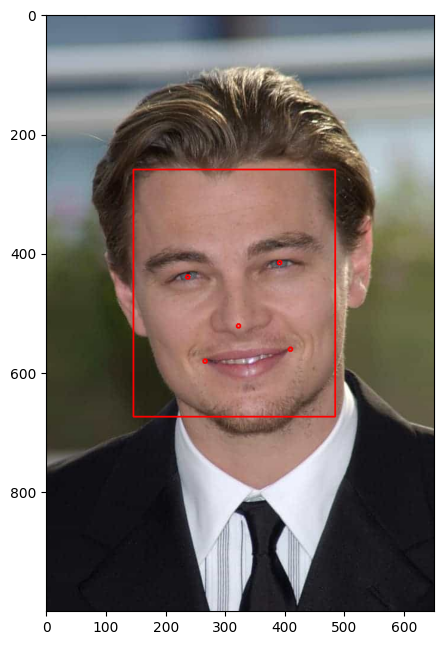

In [39]:
img = cv2.imread('input/test-images/leonardo.jpg')
size = (300, 300)
score = 0.2

# image = detect_face(img)
# image = dnn(img=img, size=size, score=score)
image = mtcnn(img)
plt.figure(figsize=(5,10))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb);


Video Demo

In [41]:
vid_capture = cv2.VideoCapture(0)

while True:
    #read the frames
    ret, frame = vid_capture.read(0)
   
    #detect faces
    # result = detect_face(frame)
    # result = dnn(img=frame, size=size, score=score)
    result = mtcnn(frame)
    cv2.imshow('Face Detection', result);
    
    #press esc key to exit
    k = cv2.waitKey(1)
    if k==27:
        break
        
vid_capture.release()
cv2.destroyAllWindows()